<a href="https://colab.research.google.com/github/twyeh/university-physics/blob/main/MaglyLib_Examples_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install magpylib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.8/188.8 kB 2.7 MB/s eta 0:00:00


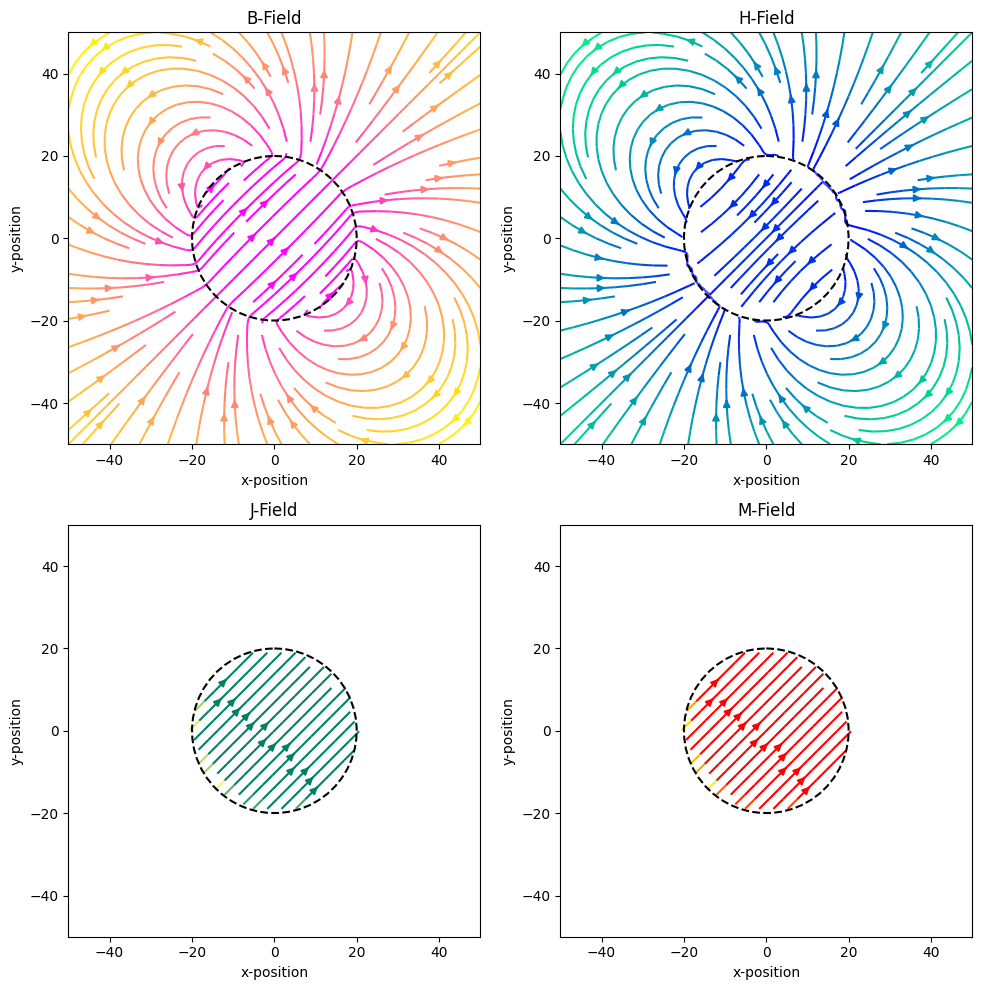

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
import magpylib as magpy

fig, [[ax1,ax2], [ax3,ax4]] = plt.subplots(2, 2, figsize=(10, 10))

# Create an observer grid in the xy-symmetry plane
grid = np.mgrid[-50:50:100j, -50:50:100j, 0:0:1j].T[0]
X, Y, _ = np.moveaxis(grid, 2, 0)

# Compute BHJM-fields of a cylinder magnet on the grid
cyl = magpy.magnet.Cylinder(polarization=(0.5, 0.5, 0), dimension=(40, 20))

B = cyl.getB(grid)
Bx, By, _ = np.moveaxis(B, 2, 0)

H = cyl.getH(grid)
Hx, Hy, _ = np.moveaxis(H, 2, 0)

J = cyl.getJ(grid)
Jx, Jy, _ = np.moveaxis(J, 2, 0)

M = cyl.getM(grid)
Mx, My, _ = np.moveaxis(M, 2, 0)

# Display field with Pyplot
ax1.streamplot(X, Y, Bx, By, color=np.log(norm(B, axis=2)), cmap="spring_r")
ax2.streamplot(X, Y, Hx, Hy, color=np.log(norm(H, axis=2)), cmap="winter_r")
ax3.streamplot(X, Y, Jx, Jy, color=norm(J, axis=2), cmap="summer_r")
ax4.streamplot(X, Y, Mx, My, color=norm(M, axis=2), cmap="autumn_r")

ax1.set_title("B-Field")
ax2.set_title("H-Field")
ax3.set_title("J-Field")
ax4.set_title("M-Field")

for ax in [ax1,ax2,ax3,ax4]:
    ax.set(
        xlabel="x-position",
        ylabel="y-position",
        aspect=1,
        xlim=(-50,50),
        ylim=(-50,50),
    )
    # Outline magnet boundary
    ts = np.linspace(0, 2 * np.pi, 50)
    ax.plot(20 * np.sin(ts), 20 * np.cos(ts), "k--")

plt.tight_layout()
plt.show()

In [3]:
import numpy as np
import magpylib as magpy

# Reset defaults set in previous example
magpy.defaults.reset()


# Define sensor with path
sensor = magpy.Sensor(pixel=[(0, 0, -0.0005), (0, 0, 0.0005)], style_size=1.5)
sensor.position = np.linspace((0, 0, -0.003), (0, 0, 0.003), 37)

angles = np.linspace(0, 360, 37)
sensor.rotate_from_angax(angles, "z", start=0)

# Define source with path
cyl1 = magpy.magnet.Cylinder(
    polarization=(0.1, 0, 0), dimension=(0.001, 0.002), position=(0.003, 0, 0)
)
cyl2 = cyl1.copy(position=(-0.003, 0, 0))
coll = magpy.Collection(cyl1, cyl2)
coll.rotate_from_angax(-angles, "z", start=0)

# Display system and field at sensor
with magpy.show_context(sensor, coll, animation=True, backend="plotly"):
    magpy.show(col=1)
    magpy.show(output="Bx", col=2, pixel_agg=None)

In [8]:
!apt-get update
!apt-get install -qq xvfb libgl1-mesa-glx
!pip install pyvista -qq

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,704 kB]
Get:10 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,244 kB]
Get:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,543 kB]
Hit:13 https://ppa.launchpadcontent.net/ubuntugi

/usr/local/lib/python3.11/dist-packages/pyvista/plotting/utilities/xvfb.py:48: PyVistaDeprecationWarning:

This function is deprecated and will be removed in future version of PyVista. Use vtk-osmesa instead.



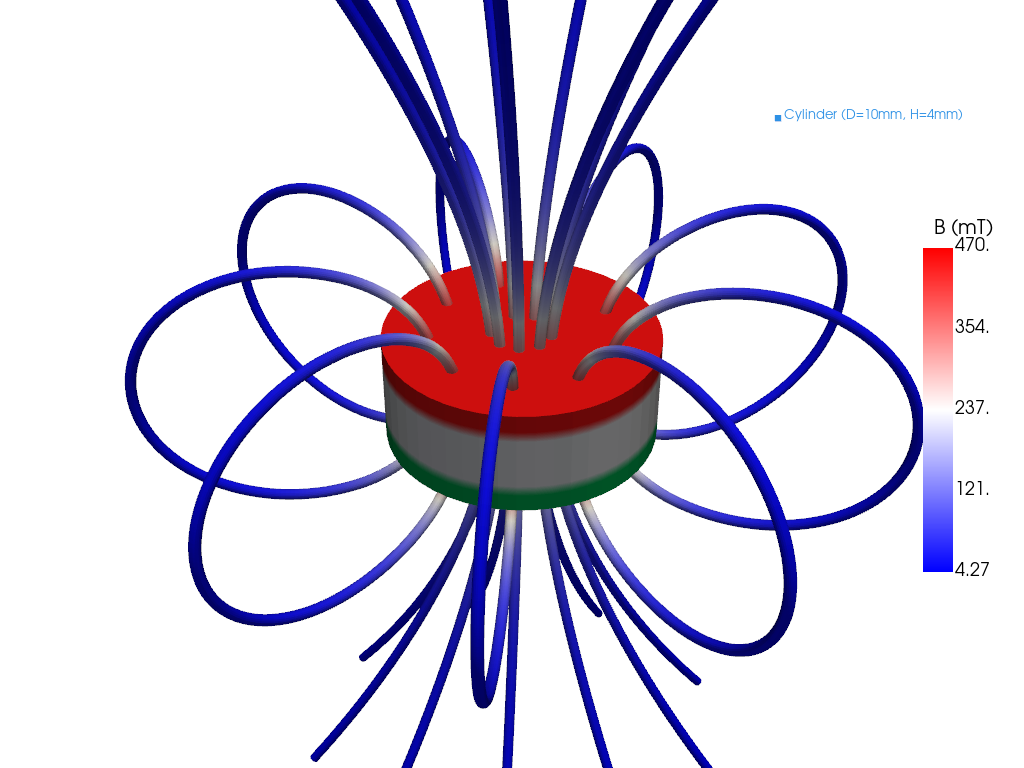

In [11]:
import magpylib as magpy
import pyvista as pv
# Seems that only static plotting is supported by colab at the moment
pv.global_theme.jupyter_backend = 'static'
pv.global_theme.notebook = True
pv.start_xvfb()

# Create a magnet with Magpylib
magnet = magpy.magnet.Cylinder(polarization=(0, 0, 1), dimension=(0.010, 0.004))

# Create a 3D grid with Pyvista
grid = pv.ImageData(
    dimensions=(41, 41, 41),
    spacing=(0.001, 0.001, 0.001),
    origin=(-0.02, -0.02, -0.02),
)

# Compute B-field and add as data to grid
grid["B"] = magnet.getB(grid.points) * 1000  # T -> mT

# Compute the field lines
seed = pv.Disc(inner=0.001, outer=0.003, r_res=1, c_res=9)
strl = grid.streamlines_from_source(
    seed,
    vectors="B",
    max_step_length=0.1,
    # max_time=.02,
    integration_direction="both",
)

# Create a Pyvista plotting scene
pl = pv.Plotter()

# Add magnet to scene - streamlines units are assumed to be meters
magpy.show(magnet, canvas=pl, units_length="m", backend="pyvista")

# Prepare legend parameters
legend_args = {
    "title": "B (mT)",
    "title_font_size": 20,
    "color": "black",
    "position_y": 0.25,
    "vertical": True,
}

# Add streamlines and legend to scene
pl.add_mesh(
    strl.tube(radius=0.0002),
    cmap="bwr",
    scalar_bar_args=legend_args,
)

# Prepare and show scene
pl.camera.position = (0.03, 0.03, 0.03)
pl.show()

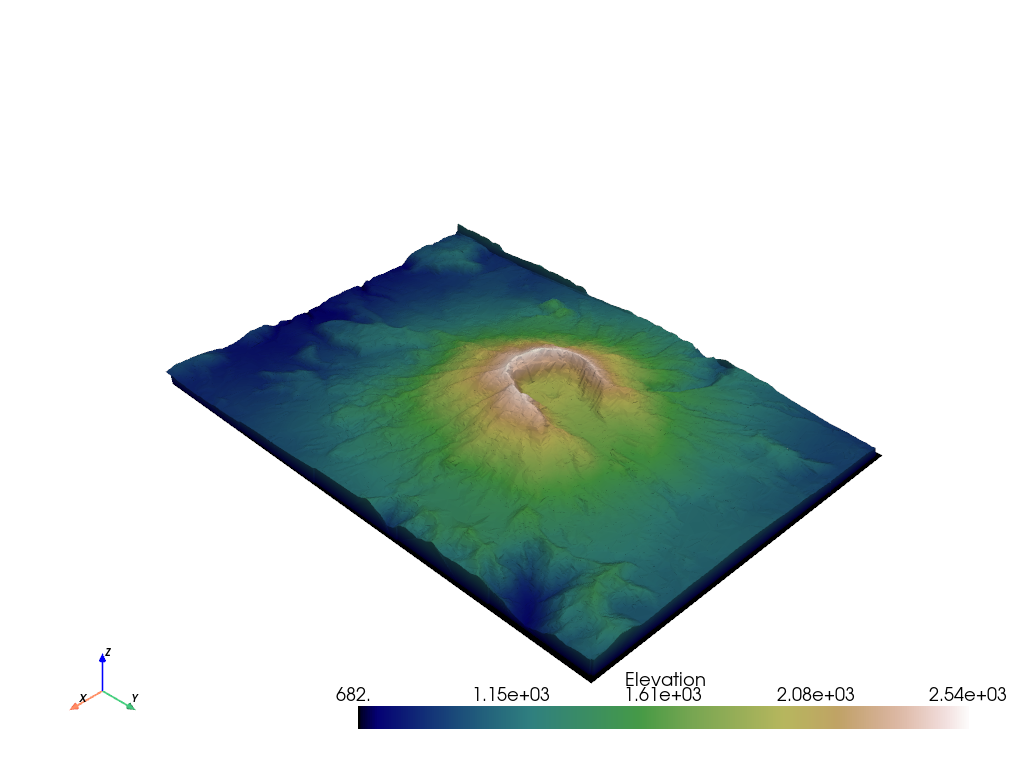

In [12]:
from pyvista import examples
mesh = examples.download_st_helens()
warped = mesh.warp_by_scalar('Elevation')
surf = warped.extract_surface().triangulate()
surf = surf.decimate_pro(0.75)  # reduce the density of the mesh by 75%
surf.plot(cmap='gist_earth')

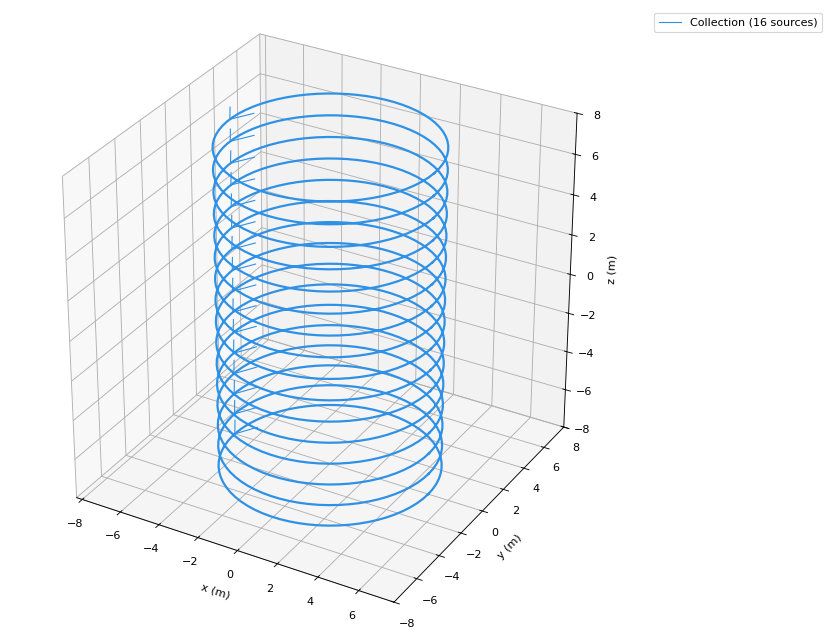

In [6]:
import numpy as np
import magpylib as magpy

coil1 = magpy.Collection()
for z in np.linspace(-8, 8, 16):
    winding = magpy.current.Circle(
        current=100,
        diameter=10,
        position=(0,0,z),
    )
    coil1.add(winding)

coil1.show()